Julian Francisco Pinchao Ortiz

1004579495

## Examen 3

1) Determine el espacio de configuraciones, en los ejes $(x,v)$, del movimiento horizontal sin fricción de una masa de $0.2\ \text{Kg}$ atada a un resorte de constante elástica $k=1\ \text{N/m}$.




In [94]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

In [149]:
m=0.2
k=1
w=np.sqrt(k/m)
Tmax=2*np.pi/w

def dU_dt(U,t):
    x,v=U 
    return [    v, 
              -k*x/m]

print(f'La solución de la ecuación diferencial es x(t)=C1cos({round(w,3)}*t)+C2sen({round(w,3)}*t)')

La solución de la ecuación diferencial es x(t)=C1cos(2.236*t)+C2sen(2.236*t)


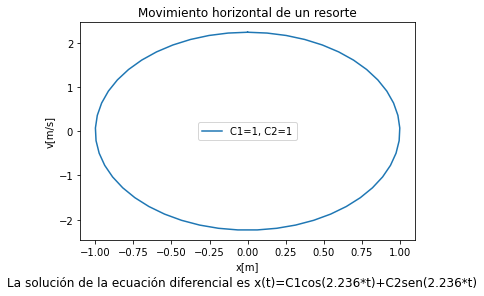

In [154]:
t = np.linspace(0,Tmax)
U0 = [0,w]
Us = integrate.odeint(dU_dt, U0, t )  
xs = Us[:,0]
ys = Us[:,1]
plt.plot(xs,ys,label='C1=1, C2=1')
plt.title('Movimiento horizontal de un resorte')
plt.suptitle(f'La solución de la ecuación diferencial es x(t)=C1cos({round(w,3)}*t)+C2sen({round(w,3)}*t)', y=0)
plt.xlabel('x[m]')
plt.ylabel('v[m/s]')
plt.legend()


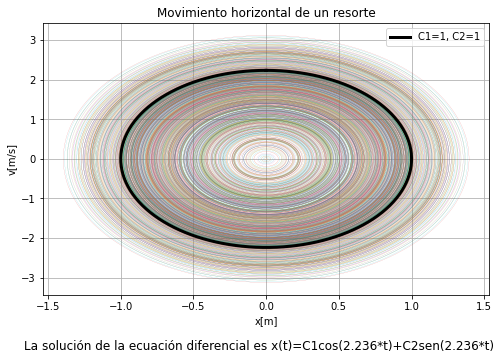

In [174]:
Nic = 1000
theta0s = np.random.uniform(0,1,Nic)
omega0s = np.random.uniform(-w,w,Nic)
U0=[theta0s[0],omega0s[0]]
U0
j=0
plt.figure( figsize = (8,5) )
for theta0, omega0 in zip(theta0s, omega0s):
    t=np.linspace(0,Tmax,400)
    U0=[theta0,omega0]
    Us=integrate.odeint(dU_dt,U0,t)
    plt.plot(Us[:,0],Us[:,1],lw = 0.1 )
    if j==Nic: #secutity stop
        break
    j=j+1
    
#Format of figure
U0 = [0,w]
Us = integrate.odeint(dU_dt, U0, t )  
xs = Us[:,0]
ys = Us[:,1]
plt.plot(xs,ys,label='C1=1, C2=1',lw=3,color='black')
plt.title('Movimiento horizontal de un resorte')
plt.suptitle(f'La solución de la ecuación diferencial es x(t)=C1cos({round(w,3)}*t)+C2sen({round(w,3)}*t)', y=0)
plt.xlabel('x[m]')
plt.ylabel('v[m/s]')
plt.grid()
plt.legend()

2) Considere una muestra de Strontium-90, ${}^{90}_{38}\text{Sr}$, que contieme inicialmente 1000 núcleos de Strontium-90 sin decaer. En la base de datos: 

[https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/strontium.json](https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/strontium.json) 

se tienen los datos de decaimiento durante 200 años. Despues de 10 años quedan 809 nucleos sin decaer, después de 22 años quedan 564 y así sucesivamente. 

El decaimiento radiativo está determinado por la formula
$$
N(t)=N_0 \operatorname{e}^{-\lambda t}\,,\qquad \lambda=\frac{\ln(2)}{\tau}
$$
* $N(t)$ es el número de núcleos radioactivos que qedan despues de un tiempo $t$
* $N_0$ es el número inicial de las partículas presentes (es decir, $t=0$)
* $\lambda$ es la constante de decaimiento
* $\tau$ es la vida medía, es decir, el tiempo durante el cual la mitad de la muestra radioactiva ha decaído.

(a) Realice un fit a los datos y determine la vida media con su respectivo error.

(b) Grafique los datos como puntos en el plano $t$, $N(t)$ y el correspondiente al fit

In [235]:
import pandas as pd
from scipy.optimize import curve_fit
datos=[{"t":0,"N(t)":1000},{"t":10,"N(t)":809},{"t":22,"N(t)":564},{"t":33,"N(t)":480},{"t":40,"N(t)":370},{"t":50,"N(t)":285},{"t":60,"N(t)":199},{"t":70,"N(t)":169},{"t":80,"N(t)":131},{"t":99,"N(t)":101},{"t":111,"N(t)":70},{"t":110,"N(t)":54},{"t":133,"N(t)":42},{"t":130,"N(t)":32},{"t":140,"N(t)":25},{"t":166,"N(t)":21},{"t":177,"N(t)":16},{"t":170,"N(t)":13},{"t":199,"N(t)":9},{"t":200,"N(t)":7}]

In [236]:
df=pd.DataFrame(datos)

In [237]:
n0=df["N(t)"][0]

In [238]:
def func(t,a):
    return n0*np.exp(-np.log(2)/a*t)

In [239]:
popt, pcov = curve_fit(func,df['t'],df['N(t)'])

In [257]:
σ = np.sqrt(np.diag(pcov))

In [258]:
print('La vida media de la muestra radioactiva es 𝜏={:.2f}±{:.2f}'.format(popt[0],σ[0]) )

La vida media de la muestra radioactiva es 𝜏=27.99±0.41


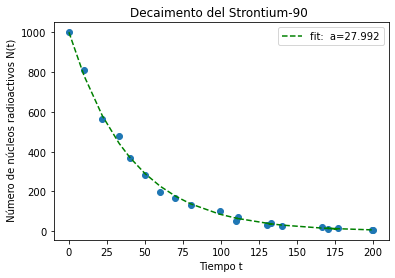

In [263]:
plt.plot(df['t'],df['N(t)'],'o')
plt.plot(df['t'], func(df["t"], *popt), 'g--',label='fit:  a=%5.3f' % tuple(popt))
plt.title('Decaimento del Strontium-90 ')
plt.ylabel(' Número de núcleos radioactivos N(t)')
plt.xlabel('Tiempo t')
plt.legend()